<a href="https://colab.research.google.com/github/RainiBenaiah/Sentiment-Analysis-Group_10/blob/main/deep_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Uninstall and reinstall numpy
!pip uninstall -y numpy
!pip install numpy==1.24.4

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 208.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 53.2 MB/s eta 0:00:00
   ━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/38.6 MB 136.9 MB/s eta 0:00:01
ERROR: Operation cancelled by user
^C


In [2]:
# Step 2: Install gensim after numpy is fixed
!pip install gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.1 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.2

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pla

In [1]:
# Load dataset
from datasets import load_dataset
dataset = load_dataset("amazon_polarity")

# Check format
dataset['train'][0], dataset['test'][0]

# Convert to pandas
import pandas as pd
df = pd.DataFrame(dataset['train']).sample(n=10000, random_state=42)  # Use 10,000 reviews
print(df['label'].value_counts())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/254M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

label
1    5046
0    4954
Name: count, dtype: int64


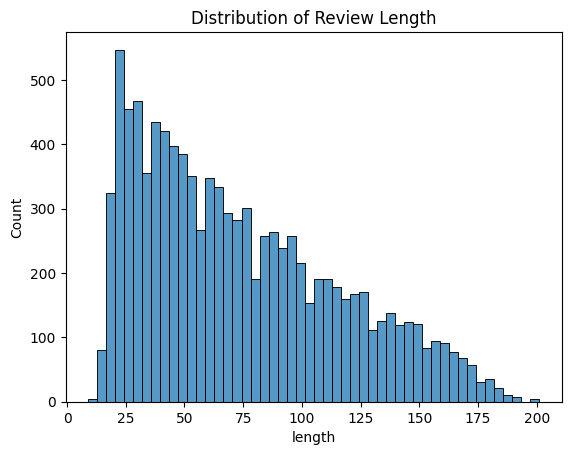

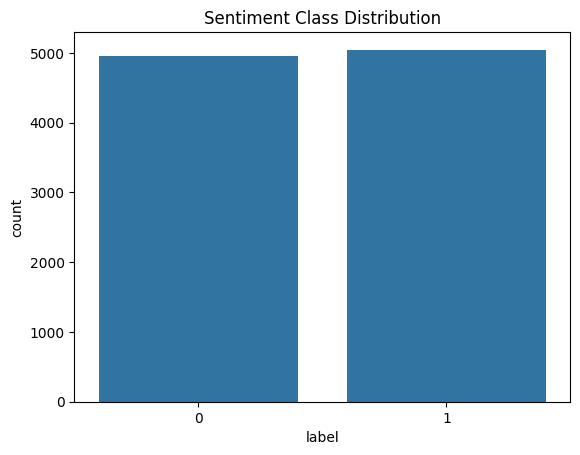

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# Length of reviews
df['length'] = df['content'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=50)
plt.title("Distribution of Review Length")
plt.show()

# Class distribution
sns.countplot(x='label', data=df)
plt.title("Sentiment Class Distribution")
plt.show()


In [3]:
!pip uninstall -y nltk
!pip install nltk --upgrade

Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.6 MB/s eta 0:00:00


In [4]:
import nltk
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Add this line
from nltk.tokenize import word_tokenize

text = "This is a test sentence!"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['This', 'is', 'a', 'test', 'sentence', '!']


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special chars
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return tokens

df['tokens'] = df['content'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from gensim.models import Word2Vec
model_w2v = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=5, workers=4)
word_vectors = model_w2v.wv


In [8]:
from datasets import load_dataset
from torch.utils.data import DataLoader, Dataset

MAX_LEN = 200

class AmazonDataset(Dataset):
    def __init__(self, texts, labels, word_vectors):
        self.texts = texts
        self.labels = labels
        self.word_vectors = word_vectors
        self.vector_size = word_vectors.vector_size

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        tokens = self.texts[idx][:MAX_LEN]
        vectors = np.zeros((MAX_LEN, self.vector_size))
        for i, word in enumerate(tokens):
            if word in self.word_vectors:
                vectors[i] = self.word_vectors[word]
        return torch.tensor(vectors, dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

# Split data
train_texts = df['tokens'][:5000]
train_labels = df['label'][:5000]
val_texts = df['tokens'][5000:6000]
val_labels = df['label'][5000:6000]

train_dataset = AmazonDataset(train_texts.tolist(), train_labels.tolist(), word_vectors)
val_dataset = AmazonDataset(val_texts.tolist(), val_labels.tolist(), word_vectors)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [9]:
import torch.nn as nn
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.dropout(h_n[-1])
        return self.fc(out)

model = LSTMClassifier(input_dim=100, hidden_dim=128, output_dim=2)


In [11]:
!pip install scikit-learn


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Use the LSTMClassifier defined earlier without the embedding layer
# The input_dim should match the vector_size of your word vectors
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.5):
        super(LSTMClassifier, self).__init__()
        # No embedding layer here, we expect pre-computed embeddings as input
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Input x is already expected to be a tensor of word vectors
        _, (h_n, _) = self.lstm(x)
        out = self.dropout(h_n[-1])
        return self.fc(out)

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Model instantiation using the correct input dimension (which is the word vector size)
# word_vectors.vector_size was set to 100 when creating the Word2Vec model
model = LSTMClassifier(input_dim=100, hidden_dim=128, output_dim=2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Improved training function with tqdm
def train(model, loader):
    model.train()
    total_loss = 0
    for x, y in tqdm(loader, desc='Training'):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        # Pass the tensor of word vectors directly to the model
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

# Improved evaluation function
def evaluate(model, loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            # Pass the tensor of word vectors directly to the model
            output = model(x)
            pred = output.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct / total

# Dataloaders with better performance (keep the same as they are providing the correct data format)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=64, num_workers=2, pin_memory=True)

# Run training loop
for epoch in range(5):
    loss = train(model, train_loader)
    acc = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Loss={loss:.4f}, Val Acc={acc:.4f}")

Training: 100%|██████████| 79/79 [05:33<00:00,  4.23s/it]


Epoch 1: Loss=0.6943, Val Acc=0.4560


Training: 100%|██████████| 79/79 [06:05<00:00,  4.63s/it]


Epoch 2: Loss=0.6939, Val Acc=0.4560


Training: 100%|██████████| 79/79 [06:03<00:00,  4.60s/it]


Epoch 3: Loss=0.6934, Val Acc=0.5440


Training: 100%|██████████| 79/79 [05:51<00:00,  4.46s/it]


Epoch 4: Loss=0.6937, Val Acc=0.5440


Training: 100%|██████████| 79/79 [05:54<00:00,  4.48s/it]


Epoch 5: Loss=0.6936, Val Acc=0.5440


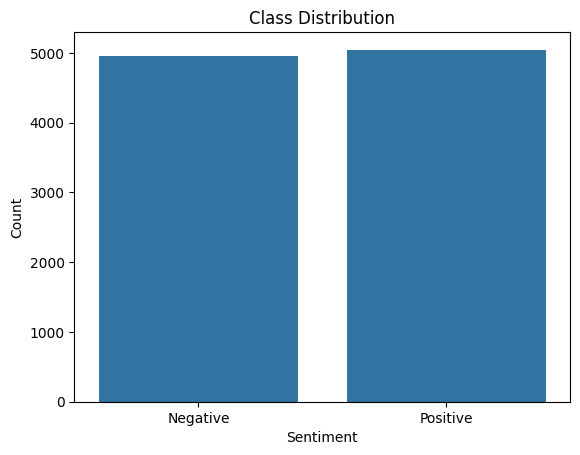

In [14]:
# Class Distribution Bar Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0,1], labels=['Negative','Positive'])
plt.show()

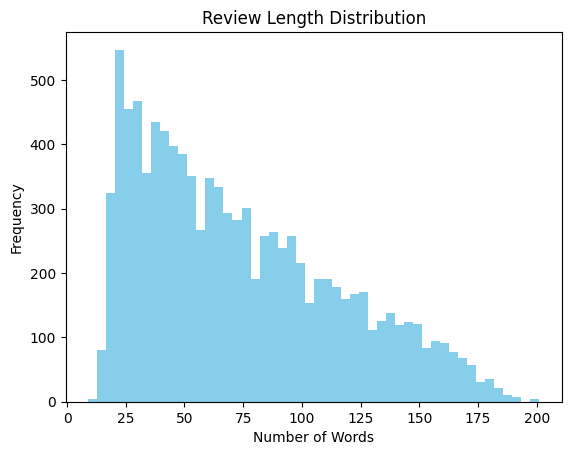

In [16]:
# Review Length Histogram
# Change 'text' to 'content' to access the review content
df['review_length'] = df['content'].apply(lambda x: len(x.split()))
plt.hist(df['review_length'], bins=50, color='skyblue')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Word Cloud for Each Class (optional)
from wordcloud import WordCloud

positive_text = ' '.join(df[df['label'] == 1]['text'])
negative_text = ' '.join(df[df['label'] == 0]['text'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')
plt.show()

<ipython-input-18-dbb2c571bd78>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='magma')


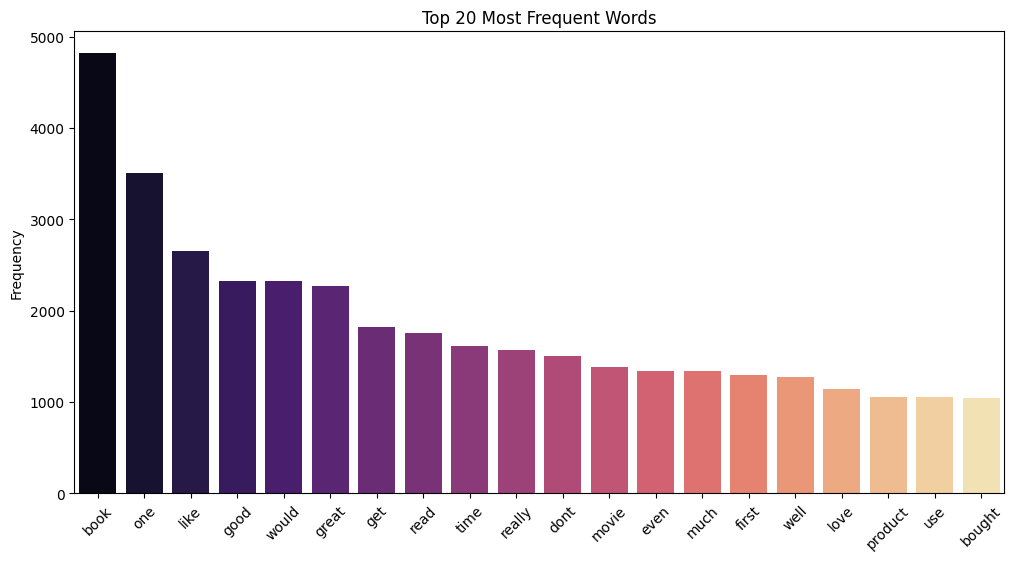

In [18]:
# Top 20 Most Frequent Words After Cleaning
from collections import Counter
import itertools

tokenized = df['tokens']  # Assumes this column exists with tokenized reviews
all_words = list(itertools.chain.from_iterable(tokenized))
word_freq = Counter(all_words).most_common(20)

words, freqs = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='magma')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

Accuracy: 0.544
F1 Score: 0.7046632124352331
Precision: 0.544
Cross-Entropy Loss: 0.6922168824129659


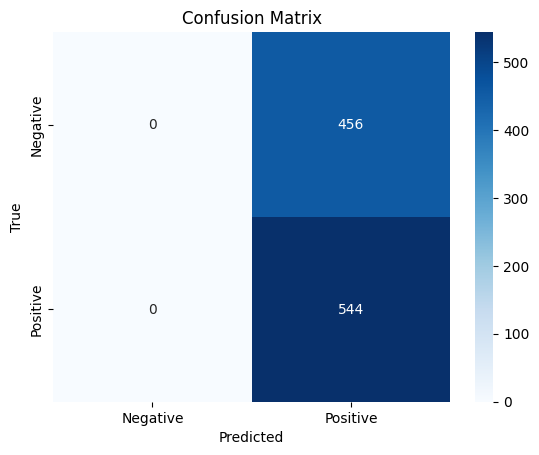

In [20]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, log_loss
import seaborn as sns
import torch # Import torch
import numpy as np # Import numpy

# Assuming you have a trained model and validation loader
# You can obtain y_true, y_pred, and y_proba from the validation set
model.eval() # Set the model to evaluation mode
y_true = []
y_pred = []
y_proba = []

with torch.no_grad():
    for x, y in val_loader: # Use your validation data loader
        x, y = x.to(device), y.to(device)
        output = model(x)
        y_true.extend(y.tolist())
        y_pred.extend(output.argmax(dim=1).tolist())
        y_proba.extend(torch.softmax(output, dim=1)[:, 1].tolist()) # Get probability for the positive class

# Convert lists to numpy arrays for sklearn functions
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_proba = np.array(y_proba)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
# Check if y_true contains only two classes before calculating log loss
if len(np.unique(y_true)) == 2:
    print("Cross-Entropy Loss:", log_loss(y_true, y_proba))
else:
    print("Cannot calculate Cross-Entropy Loss for more than two classes.")


# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()